In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Fraud.csv')

In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1923740,167,TRANSFER,1086309.88,C791562712,0.00,0.00,C239696745,3065631.33,4151941.21,0,0
3151836,237,CASH_IN,412598.61,C802924237,4518547.77,4931146.38,C131307582,4562524.41,4149925.81,0,0
1212935,133,PAYMENT,13001.95,C1633243521,0.00,0.00,M1431150642,0.00,0.00,0,0
3273326,251,TRANSFER,119011.35,C1359461628,20749.00,0.00,C158474181,4824913.56,4943924.91,0,0
1972125,178,CASH_OUT,522140.27,C309214530,52545.00,0.00,C608767708,166594.25,688734.52,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Data cleaning

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
# Correlation
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

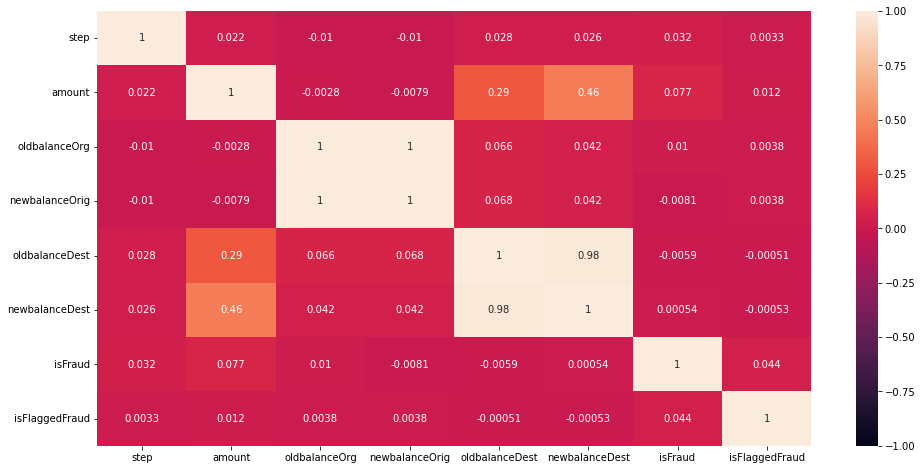

In [8]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(method ='pearson'),annot=True,vmin=-1, vmax=1)

In [9]:
#  No strong corelation between any features and the target column
#  Strong correlation between old and new balance in source and destination, So in modeling we can use only one column from source and destination

In [10]:
df['day_of_month'] =np.ceil(df['step']/24)


In [11]:
df.day_of_month.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.])

<AxesSubplot:xlabel='type', ylabel='count'>

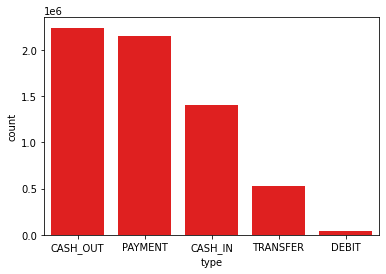

In [12]:
# Types of transaction

sns.countplot(x='type',data=df,order=df['type'].value_counts().index,color = 'r')

In [13]:
# types of transaction where fraud occurs

fraud = df[df['isFraud']==1].groupby('type')['isFraud'].count()

In [14]:
fraud = pd.DataFrame(data = fraud)

<BarContainer object of 2 artists>

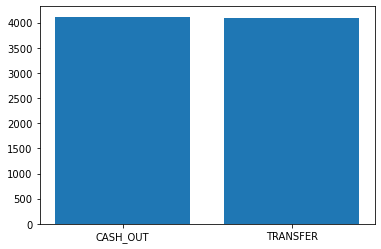

In [15]:
plt.bar(fraud.index,fraud.isFraud)

In [16]:
# fraud transactions occurs only in the Cashout and tranfer type

In [17]:
ct = df[df['type'].isin(['CASH_OUT','TRANSFER'])]


In [18]:
ct

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day_of_month
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1.0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,1.0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,1.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,31.0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,31.0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,31.0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,31.0


In [19]:
fraud_in_cash = ct[ct['type'] == 'CASH_OUT']
fraud_in_cash[fraud_in_cash['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day_of_month
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,1.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,1.0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0,1.0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0,1.0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,31.0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,31.0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,31.0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,31.0


In [20]:
# In fraud transactions of type cash out, it's noticed that the origin balance goes back to zero 
# after the cash out

In [21]:
fraud_in_transfer = ct[ct['type'] == 'TRANSFER']
fraud_in_transfer[fraud_in_transfer['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day_of_month
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0,1.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0,1.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0,1.0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0,1.0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0,31.0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0,31.0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0,31.0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0,31.0


In [22]:
#  in Fraud transaction of type transfer it's noticed that the whole 
#  amount in the account of origin is emptied with no access on Destination balance

<AxesSubplot:xlabel='day_of_month', ylabel='amount'>

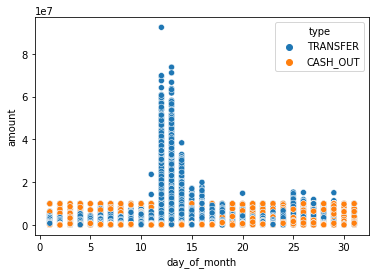

In [23]:
sns.scatterplot(data= ct , x = 'day_of_month', y='amount',hue = 'type')

In [24]:
# here we can see that cashout types are taking place all month long, but there is a spike 11th to 15th 
# of every month where transfer fraud is taking place more.

## Data distribution

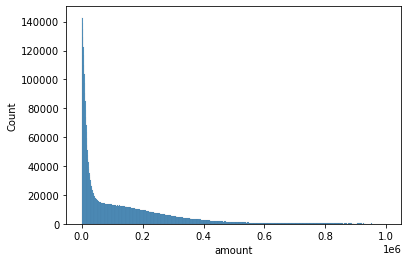

In [25]:
bin_values = np.arange(start=0, stop=1000000, step=1000)
g = sns.histplot(df['amount'],bins=bin_values)

<AxesSubplot:xlabel='newbalanceDest', ylabel='Count'>

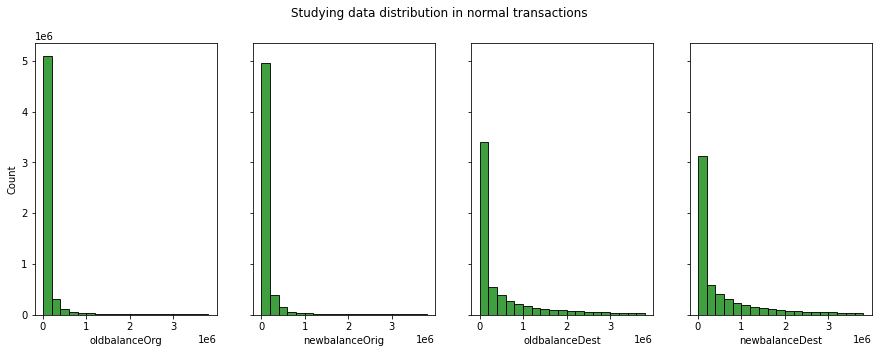

In [26]:
bin_values = np.arange(start=0, stop=4000000, step=200000)
fig, axes = plt.subplots(1, 4,figsize=(15,5),sharey=True)
fig.suptitle('Studying data distribution in normal transactions')
sns.histplot(ax = axes[0],x='oldbalanceOrg',bins=bin_values,data=df[df['isFraud']==0],color = 'green')
sns.histplot(ax = axes[1],x='newbalanceOrig',bins=bin_values,data=df[df['isFraud']==0],color = 'green')
sns.histplot(ax = axes[2],x='oldbalanceDest',bins=bin_values,data=df[df['isFraud']==0],color = 'green')
sns.histplot(ax = axes[3],x='newbalanceDest',bins=bin_values,data=df[df['isFraud']==0],color = 'green')

<AxesSubplot:xlabel='newbalanceDest', ylabel='Count'>

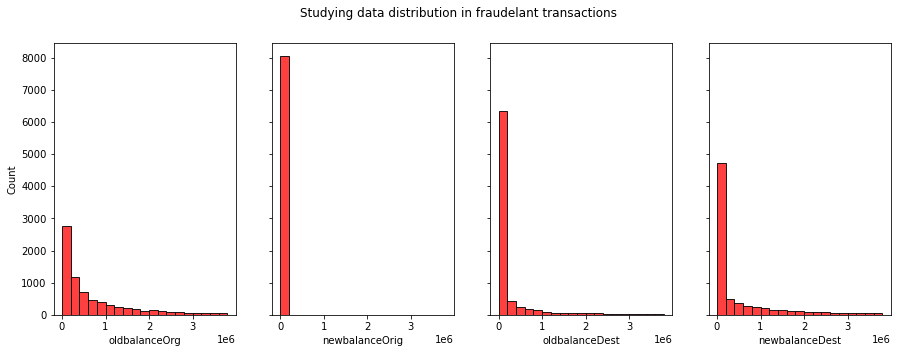

In [27]:
in_values = np.arange(start=0, stop=4000000, step=200000)
fig, axes = plt.subplots(1, 4,figsize=(15,5),sharey=True)
fig.suptitle('Studying data distribution in fraudelant transactions')
sns.histplot(ax = axes[0],x='oldbalanceOrg',bins=bin_values,data=df[df['isFraud']==1],color = 'red')
sns.histplot(ax = axes[1],x='newbalanceOrig',bins=bin_values,data=df[df['isFraud']==1],color = 'red')
sns.histplot(ax = axes[2],x='oldbalanceDest',bins=bin_values,data=df[df['isFraud']==1],color = 'red')
sns.histplot(ax = axes[3],x='newbalanceDest',bins=bin_values,data=df[df['isFraud']==1],color = 'red')

In [28]:
# distribution is right skewed.

In [29]:
# Categorical variables

df[['type', 'nameOrig', 'nameDest','isFlaggedFraud']]


,type,nameOrig,nameDest,isFlaggedFraud
0,PAYMENT,C1231006815,M1979787155,0
1,PAYMENT,C1666544295,M2044282225,0
2,TRANSFER,C1305486145,C553264065,0
3,CASH_OUT,C840083671,C38997010,0
4,PAYMENT,C2048537720,M1230701703,0
...,...,...,...,...
6362615,CASH_OUT,C786484425,C776919290,0
6362616,TRANSFER,C1529008245,C1881841831,0
6362617,CASH_OUT,C1162922333,C1365125890,0
6362618,TRANSFER,C1685995037,C2080388513,0


In [30]:
df['nameOrig_code'] = df['nameOrig'].str[0]
df['nameDest_code'] = df['nameDest'].str[0]

In [31]:
df['nameOrig_code'].unique()

array(['C'], dtype=object)

In [32]:
# dropping nameOrig as it has only customer data in the rows.

df.drop(['nameDest','nameOrig_code','nameOrig'], axis = 1 , inplace = True)

In [33]:
## Numerical Data 

num_cols = ['step','oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest','amount']
for col in num_cols:
    Q1,Q3 = np.percentile(df[col], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = df[col][(df[col] > ul) | (df[col] < ll)]
    print(f'{col}:{len(outliers)}')

step:102688
oldbalanceOrg:1112507
newbalanceOrig:1053391
oldbalanceDest:786135
newbalanceDest:738527
amount:338078


C:\Users\piyus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

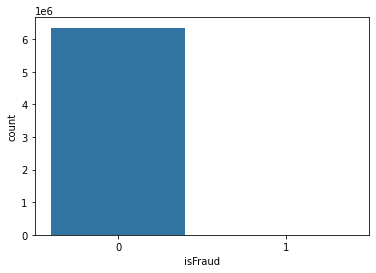

In [34]:
sns.countplot(df['isFraud'])

In [35]:
# For data imbalance we will use undersampling technique

def underSampling(df,target):
    down = min(df[target].value_counts())
    majority_index = df[df[target] == 0].index
    minority_index = df[df[target] == 1].index
    random_major_index= np.random.choice(majority_index,down,replace=False)
    under_sample_index = np.concatenate([minority_index,random_major_index])
    under_sample = df.loc[under_sample_index]
    return under_sample




## DATA MODELING

In [36]:
df = underSampling(df,'isFraud')

In [37]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score

In [38]:
## NOW SCALING NUMERICAL VARIABLES AND ENCODING CATEGORICAL VARIABLES

In [39]:
num_cols = ['step','oldbalanceOrg','oldbalanceDest','amount']
cat_cols = ['type', 'nameDest_code','isFlaggedFraud']

In [40]:
full_pipeline = ColumnTransformer([
 ("num", StandardScaler(), num_cols),
 ("cat", OneHotEncoder(), cat_cols),
 ])

In [41]:
def train_test (df,target):
    X = df.drop(target,axis = 1)
    X = X.iloc[:,:]
    y = df[target]   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [42]:
X_train, X_test, y_train, y_test = train_test(df,'isFraud')

In [43]:
X_train_cleaned= full_pipeline.fit_transform(X_train)
X_test_cleaned =full_pipeline.transform(X_test)

In [44]:
# Modeling

def printScores(y_test, y_pred):
    print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))
    print('accuracy_score',accuracy_score(y_test, y_pred))
    print('Recall_score',recall_score(y_test, y_pred))
    print('precision_score',precision_score(y_test, y_pred))
    print('f1_score',f1_score(y_test,y_pred))

In [45]:
knn_clf = KNeighborsClassifier()
y_train_pred = cross_val_predict(knn_clf,X_train_cleaned,y_train, cv = 10)
y_test_pred =  cross_val_predict(knn_clf,X_test_cleaned,y_test, cv = 10)

In [46]:
printScores(y_train,y_train_pred)

Confusion matrix:
 [[6209  367]
 [ 479 6085]]
accuracy_score 0.9356164383561644
Recall_score 0.9270262035344302
precision_score 0.9431184128952262
f1_score 0.9350030731407498


In [47]:
printScores(y_test,y_test_pred)

Confusion matrix:
 [[1519  118]
 [ 134 1515]]
accuracy_score 0.9233110164333537
Recall_score 0.9187386294724075
precision_score 0.9277403551745255
f1_score 0.923217550274223


In [48]:
reg = LogisticRegression()   
reg.fit(X_train_cleaned, y_train)
y_train_pred1 = reg.predict(X_train_cleaned)
y_test_pred1 = reg.predict(X_test_cleaned)

In [49]:
printScores(y_train,y_train_pred1)

Confusion matrix:
 [[5350 1226]
 [ 730 5834]]
accuracy_score 0.8511415525114155
Recall_score 0.88878732480195
precision_score 0.8263456090651559
f1_score 0.8564298297122723


In [50]:
printScores(y_test,y_test_pred1)

Confusion matrix:
 [[1364  273]
 [ 183 1466]]
accuracy_score 0.8612294583079733
Recall_score 0.8890236506973923
precision_score 0.8430132259919494
f1_score 0.8654073199527744


In [51]:
# USED KNN AND LOGISTIC CLASSIFIER AMONG THOSE TWO KNN HAS BETTER CLASSIFICATION REPORT

In [ ]:
# Company should develop there infrastructure in cashout and transfer type of payments, should increas